![Spotify logo](https://www.somagnews.com/wp-content/uploads/2021/07/Spotify-1.jpg)


# <font color='green'><center>Base de Dados do Spotify</font></center>

O Spotify disponibiliza aos seus usuários dados da própria conta, basta solicitar:
- https://www.spotify.com/br-pt/account/privacy/

Há 3 opções:
- <b>Dados da conta -></b> Traz dados de: Playlists; Histórico de streaming do ano passado; Lista de itens salvos na Sua Biblioteca; Buscas etc. O prazo para te retornarem é de 5 dias.
- <b>Histórico ampliado de streamings -></b> Histórico ampliado de streamings desde o início da conta, incluindo as informações das faixas e quando e como você ouviu os conteúdos. O prazo para te retornarem é de 30 dias.
- <b>Informações técnicas de registro -></b> Informações técnicas de registro que eles coletam sobre sua conta para solucionar problemas e fornecer o serviço Spotify. O prazo para te retornarem é de 30 dias.

Aqui usarei os Dados da Conta - Histórico de streaming do ano passado

In [1]:
# Bibliotecas
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import calendar
import locale
from datetime import datetime
import os
from openpyxl import Workbook
from openpyxl.drawing.image import Image

# Carregar dados

In [2]:
# Históricos de streaming pessoais em formato JSON obtidos do Spotify
streamings1 = pd.read_json(r'C:\Users\Usuário\Documents\DataScience\Projetos\Spotify\MyData\StreamingHistory0.json',encoding='utf-8')
streamings2 = pd.read_json(r'C:\Users\Usuário\Documents\DataScience\Projetos\Spotify\MyData\StreamingHistory1.json',encoding='utf-8')
streamings3 = pd.read_json(r'C:\Users\Usuário\Documents\DataScience\Projetos\Spotify\MyData\StreamingHistory2.json',encoding='utf-8')

In [3]:
streamings1.head()

,endTime,artistName,trackName,msPlayed
0,2022-07-07 03:45,DotEXE,Monster (Rework),214058
1,2022-07-09 23:57,Judas Priest,Victim of Changes - Live,229445
2,2022-07-10 03:15,DotEXE,Monster (Rework),40760
3,2022-07-10 03:20,Fresno,INV013: DEIXA ELE ANDAR (feat. Nill),173942
4,2022-07-10 03:24,Residente,This is Not America (feat. Ibeyi),231332


In [4]:
# Tamanho da base de dados
streamings1.shape

(10000, 4)

In [5]:
streamings2.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-11 13:34,IRA,Rap Queen Filo de Diamante,152275
1,2022-12-11 13:38,Aterciopelados,Más Allá de la Ventana,219831
2,2022-12-11 13:41,Dead Fish,Bem-Vindo Ao Clube,188026
3,2022-12-11 13:45,Evanescence,Use My Voice,242013
4,2022-12-11 13:47,$uicideboy$,$uicideboy$ Were Better In 2015,143346


In [6]:
#tamanho da base de dados
streamings2.shape

(10000, 4)

In [7]:
streamings3.head()

,endTime,artistName,trackName,msPlayed
0,2023-05-14 21:51,Ana Tijoux,Mal,257925
1,2023-05-14 21:53,The Mars Volta,No Case Gain,161462
2,2023-05-14 21:58,Helloween,Golden Times,287696
3,2023-05-14 22:03,She Wants Revenge,Tear You Apart,284613
4,2023-05-14 22:08,Deftones,Beauty School,287840


In [8]:
#tamanho da base de dados
streamings3.shape

(3312, 4)

## Manipulação de Dados

In [9]:
# Concatenar tabelas
df = pd.concat([streamings1, streamings2, streamings3], axis=0)
df

,endTime,artistName,trackName,msPlayed
0,2022-07-07 03:45,DotEXE,Monster (Rework),214058
1,2022-07-09 23:57,Judas Priest,Victim of Changes - Live,229445
2,2022-07-10 03:15,DotEXE,Monster (Rework),40760
3,2022-07-10 03:20,Fresno,INV013: DEIXA ELE ANDAR (feat. Nill),173942
4,2022-07-10 03:24,Residente,This is Not America (feat. Ibeyi),231332
...,...,...,...,...
3307,2023-07-09 23:52,T.I.,Dead And Gone,12796
3308,2023-07-09 23:52,Ne-Yo,Because Of You,1942
3309,2023-07-09 23:53,Ne-Yo,Mad,3903
3310,2023-07-09 23:53,Ne-Yo,Let Me Love You (Until You Learn To Love Yours...,2159


In [10]:
df.shape

(23312, 4)

In [11]:
# Renomear as colunas
novo_nome_colunas = {'endTime': 'Data da reprodução',
                     'artistName': 'Artista',
                     'trackName': 'Música',
                     'msPlayed': 'Milissegundos de Reprodução'}
df = df.rename(columns=novo_nome_colunas)

In [12]:
# Amostra aleatoria
df.sample(30)

,Data da reprodução,Artista,Música,Milissegundos de Reprodução
626,2022-07-18 22:09,Rammstein,Stein um Stein,232413
3264,2022-08-28 01:17,Stone Sour,The Conflagration,295946
8182,2023-04-16 13:07,Tom Morello,Lightning Over Mexico,251707
4743,2023-02-18 14:00,Elphomega,Stardust,267346
3062,2022-08-25 14:41,Cássia Eller,Por Enquanto,244200
9346,2023-05-05 00:54,Florence + The Machine,Never Let Me Go,270973
4258,2022-09-11 15:51,Nevermore,This Godless Endeavor,535746
1720,2023-06-11 17:15,$uicideboy$,My Flaws Burn Through My Skin Like Demonic Fla...,167679
5516,2022-09-29 00:27,Iron Maiden,When Two Worlds Collide - 2015 Remaster,377133
1970,2022-08-09 00:55,Alice In Chains,Rotten Apple,418466


## Limpeza de dados

In [13]:
# Somando as linhas sem valores
df.isnull().sum()

Data da reprodução             0
Artista                        0
Música                         0
Milissegundos de Reprodução    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23312 entries, 0 to 3311
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Data da reprodução           23312 non-null  object
 1   Artista                      23312 non-null  object
 2   Música                       23312 non-null  object
 3   Milissegundos de Reprodução  23312 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 910.6+ KB


In [15]:
# Converter coluna 'Data da reprodução' para o tipo datetime
df['Data da reprodução'] = pd.to_datetime(df['Data da reprodução'])

In [16]:
# Conferir quais são a primeira e última data de registro
registro1 = df['Data da reprodução'].min() 
ultimo_registro = df['Data da reprodução'].max()

print(f'O primeiro registro dessa playlist foi: {registro1}')
print(f'O último registro dessa playlist foi: {ultimo_registro}')

O primeiro registro dessa playlist foi: 2022-07-07 03:45:00
O último registro dessa playlist foi: 2023-07-09 23:55:00


## Análise de Dados

In [17]:
# Qtde de artistas que aparecem nessa playlist
valores_unicos = df['Artista'].unique()
print(len(valores_unicos))

669


In [18]:
# Calcular quantas vezes o mesmo artista aparece - Top 10
contagem_artista = df['Artista'].value_counts().head(10)
contagem_artista

Fresno                  869
Alice In Chains         541
Hayley Kiyoko           489
Rammstein               478
Lil Peep                460
Metallica               458
Pitty                   428
Bring Me The Horizon    404
$uicideboy$             403
Charlie Brown Jr.       387
Name: Artista, dtype: int64

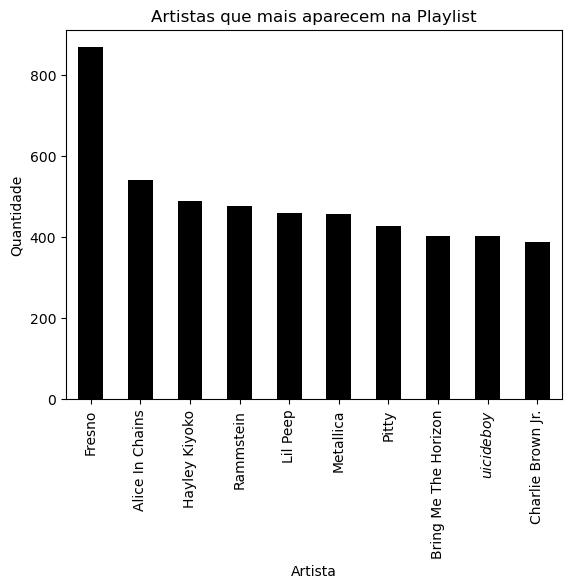

In [19]:
# Plotar o gráfico de barras
contagem_artista.plot(kind='bar', color = "black")
plt.xlabel('Artista')
plt.ylabel('Quantidade')
plt.title('Artistas que mais aparecem na Playlist')
plt.show()

In [20]:
# Transformar em um dataframe
contagem_artista = pd.DataFrame(contagem_artista).reset_index(drop=False)
contagem_artista = contagem_artista.rename(columns={'index': 'Artista', 'Artista': 'Contagem'})
contagem_artista

,Artista,Contagem
0,Fresno,869
1,Alice In Chains,541
2,Hayley Kiyoko,489
3,Rammstein,478
4,Lil Peep,460
5,Metallica,458
6,Pitty,428
7,Bring Me The Horizon,404
8,$uicideboy$,403
9,Charlie Brown Jr.,387


In [21]:
#Músicas mais tocadas da banda mais frequente
valores_filtrados = df[df['Artista'] == 'Fresno']
artista_musicas_mais_tocadas = valores_filtrados.groupby('Artista')['Música'].value_counts()
artista_musicas_mais_tocadas.head(20)

Artista  Música                                          
Fresno   INV013: DEIXA ELE ANDAR (feat. Nill)                108
         Sua Alegria Foi Cancelada                            73
         INV011: E VEJA SÓ (feat. Jup do Bairro)              71
         Essa Coisa (Acorda - Trabalha - Repete - Mantém)     42
         INV014: EU INVENTEI VOCÊ (feat. Lio)                 40
         ELES ODEIAM GENTE COMO NÓS                           30
         A Minha História Não Acaba Aqui                      25
         Diga, parte 2                                        22
         Desde Quando Você Se Foi                             20
         We'll Fight Together                                 20
         Casa Assombrada                                      17
         Natureza Caos                                        17
         Vou Ter Que Me Virar                                 15
         Abrace Sua Sombra                                    14
         INV015: DIGA, PARTE 1 (

In [22]:
# Qtde de músicas que aparecem nessa playlist
valores_unicos = df['Música'].unique()
print(len(valores_unicos))

2922


In [23]:
# Calcular qtas vezes a mesma Música foi executada - Top 15
contagem_musica = df['Música'].value_counts()
contagem_musica.head(15)

INV013: DEIXA ELE ANDAR (feat. Nill)           108
This is Not America (feat. Ibeyi)              105
The Lost Cause (feat. Manchester Orchestra)     99
Monster (Rework)                                91
Wolf Like Me                                    84
El paseo de los tristes                         80
Bambola - Merk & Kremont Remix                  79
Vermilion, Pt. 2                                77
Sua Alegria Foi Cancelada                       73
chance                                          73
Sonne                                           72
INV011: E VEJA SÓ (feat. Jup do Bairro)         71
The Hills                                       70
Mal                                             70
for the girls                                   69
Name: Música, dtype: int64

In [24]:
# Descobrir qual artista das músicas mais tocadas
# Obter os valores únicos na coluna 'Música'
valores_unicos = contagem_musica.index[:15]

# Criar lista de dicionários com os valores únicos, artistas associados e contagem
dados = []
for valor in valores_unicos:
    artistas_unicos = set(df[df['Música'] == valor]['Artista'])
    artistas_str = ', '.join(artistas_unicos)
    contagem = contagem_musica[valor]
    dados.append({'Música': valor, 'Artista': artistas_str, 'Contagem': contagem})
    
# Criar o novo DataFrame
musica_artista = pd.DataFrame(dados)
musica_artista

,Música,Artista,Contagem
0,INV013: DEIXA ELE ANDAR (feat. Nill),Fresno,108
1,This is Not America (feat. Ibeyi),Residente,105
2,The Lost Cause (feat. Manchester Orchestra),Tom Morello,99
3,Monster (Rework),DotEXE,91
4,Wolf Like Me,TV On The Radio,84
5,El paseo de los tristes,Mägo de Oz,80
6,Bambola - Merk & Kremont Remix,Betta Lemme,79
7,"Vermilion, Pt. 2",Slipknot,77
8,Sua Alegria Foi Cancelada,Fresno,73
9,chance,Hayley Kiyoko,73


In [25]:
# Nome da pasta a ser criada
nome_pasta = 'Grafico'

# Verificar se a pasta não existe e, se não existir, criar
if not os.path.exists(nome_pasta):
    os.makedirs(nome_pasta)

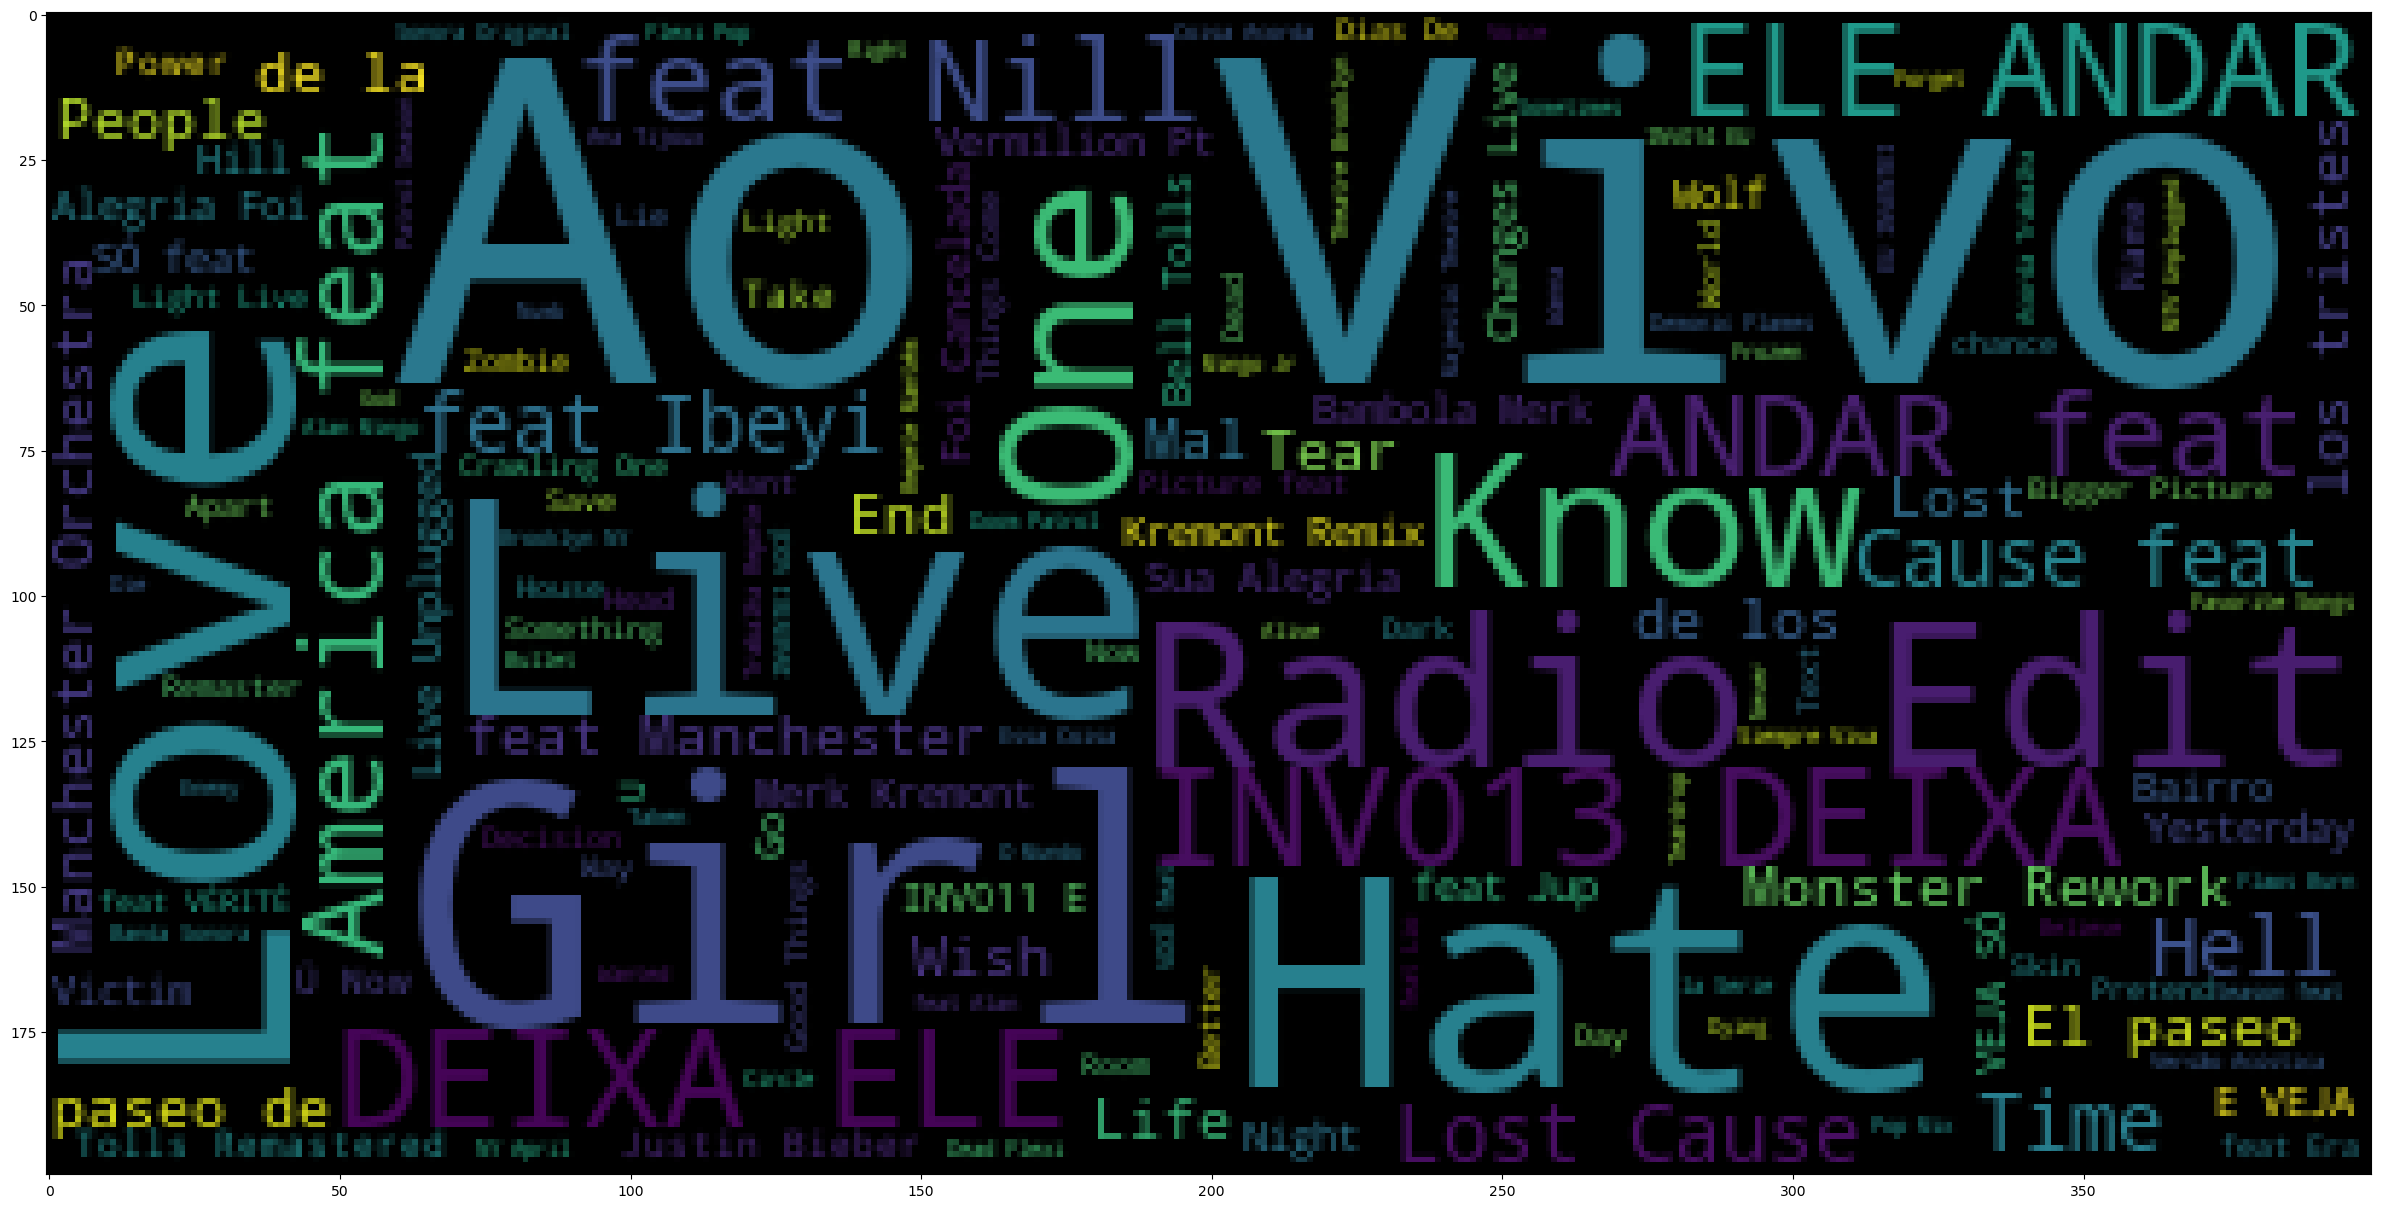

In [26]:
# Palavras que mais aparecem no título das músicas
lista = df['Música'].tolist()
paragrafo = " ".join(lista)
plt.figure(figsize=(30,30))
plt.imshow(WordCloud().generate(paragrafo))

# Salvar o gráfico 
caminho_arquivo = os.path.join(nome_pasta, 'grafico1.jpeg')
plt.savefig(caminho_arquivo, bbox_inches='tight', pad_inches=0)

In [27]:
# Extrair o mês da coluna 'Data da reprodução' e contar o número de reproduções em cada mês
reproducoes_por_mes = df['Data da reprodução'].dt.month.value_counts().sort_index()
print(reproducoes_por_mes)

1     2286
2     1966
3     1801
4     1782
5     2015
6     1622
7     1993
8     1985
9     2252
10    1813
11    1866
12    1931
Name: Data da reprodução, dtype: int64


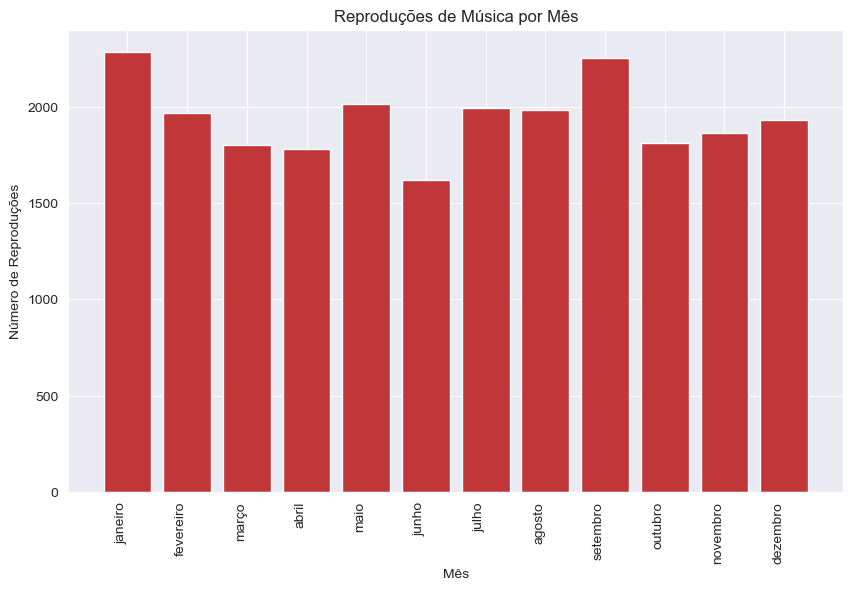

In [28]:
# Definir o locale para o idioma português
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

# Converter os números dos meses para os nomes dos meses em português
meses = [pd.to_datetime(str(i), format='%m').strftime('%B') for i in reproducoes_por_mes.index]

# Criar o gráfico de barras com os nomes dos meses em português
sns.set_style('darkgrid')
sns.set_palette('RdBu')  
plt.figure(figsize=(10, 6))
plt.bar(meses, reproducoes_por_mes)
plt.xlabel('Mês')
plt.ylabel('Número de Reproduções')
plt.title('Reproduções de Música por Mês')
# Girar os rótulos do eixo x para evitar sobreposição
plt.xticks(rotation=90, ha='right')
plt.show()

In [29]:
# Extrair a hora do dia da coluna 'Data da reprodução' e contar o número de reproduções em cada hora
reproducoes_por_hora = df['Data da reprodução'].dt.hour.value_counts().sort_index()
print(reproducoes_por_hora)

0     1643
1      866
2      483
3      105
8      993
9       67
10     253
11     387
12    1104
13    2337
14    1813
15    1386
16    1492
17    2577
18    2215
19    1209
20     665
21     610
22     622
23    2485
Name: Data da reprodução, dtype: int64


In [30]:
# Mapear os valores numericos dos dias da semana para pt-Br
dia_semana_map = {
    0: 'Segunda-feira',
    1: 'Terça-feira',
    2: 'Quarta-feira',
    3: 'Quinta-feira',
    4: 'Sexta-feira',
    5: 'Sábado',
    6: 'Domingo'
}

# extraindo o dia da semana
df['Dia_Semana'] = df['Data da reprodução'].dt.dayofweek.map(dia_semana_map)
df

,Data da reprodução,Artista,Música,Milissegundos de Reprodução,Dia_Semana
0,2022-07-07 03:45:00,DotEXE,Monster (Rework),214058,Quinta-feira
1,2022-07-09 23:57:00,Judas Priest,Victim of Changes - Live,229445,Sábado
2,2022-07-10 03:15:00,DotEXE,Monster (Rework),40760,Domingo
3,2022-07-10 03:20:00,Fresno,INV013: DEIXA ELE ANDAR (feat. Nill),173942,Domingo
4,2022-07-10 03:24:00,Residente,This is Not America (feat. Ibeyi),231332,Domingo
...,...,...,...,...,...
3307,2023-07-09 23:52:00,T.I.,Dead And Gone,12796,Domingo
3308,2023-07-09 23:52:00,Ne-Yo,Because Of You,1942,Domingo
3309,2023-07-09 23:53:00,Ne-Yo,Mad,3903,Domingo
3310,2023-07-09 23:53:00,Ne-Yo,Let Me Love You (Until You Learn To Love Yours...,2159,Domingo


In [31]:
# Contar o número de execuções de música por dia da semana
contagem_dias = df['Dia_Semana'].value_counts()
contagem_dias

Sábado           4228
Domingo          3712
Sexta-feira      3700
Quinta-feira     3315
Quarta-feira     3158
Segunda-feira    2660
Terça-feira      2539
Name: Dia_Semana, dtype: int64

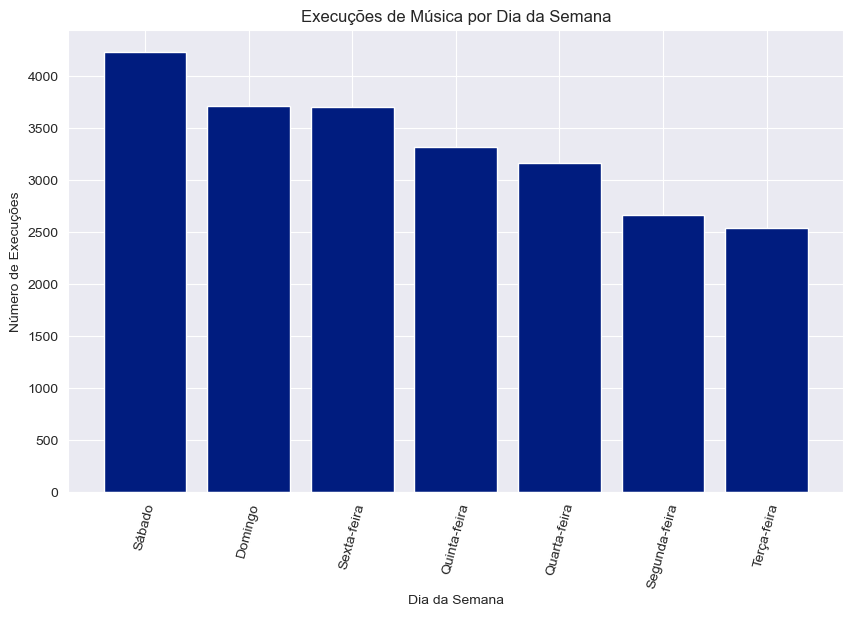

In [32]:
# Criar o gráfico de barras
sns.set_palette('dark') 
plt.figure(figsize=(10, 6))
plt.bar(contagem_dias.index, contagem_dias)
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Execuções')
plt.title('Execuções de Música por Dia da Semana')
plt.xticks(contagem_dias.index, rotation=75)
plt.show()

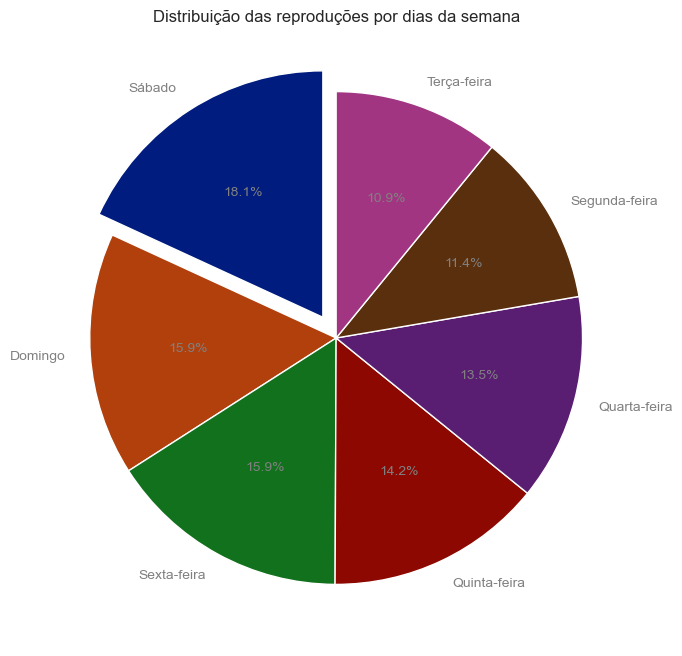

In [33]:
# Calcula o índice do maior valor
indice_maior_valor = contagem_dias.idxmax()
# Cria uma lista com os valores de afastamento das fatias
explode = [0.1 if i == indice_maior_valor else 0 for i in contagem_dias.index]

#criar gráfico de pizza 
plt.figure(figsize=(8, 8))
contagem_dias.plot(kind='pie', autopct='%1.1f%%', startangle=90, textprops={'color': 'gray'}, explode=explode)
plt.title('Distribuição das reproduções por dias da semana')
plt.ylabel('')
plt.show()

In [34]:
# Calcular a duração média de reprodução em segundos
duracao_media = df['Milissegundos de Reprodução'].mean() / 1000
print(f"Duração média de reprodução: {duracao_media:.2f} segundos")

duracao_media_minutos = duracao_media / 60
print(f"Duração média de reprodução: {duracao_media_minutos:.2f} minutos")

Duração média de reprodução: 224.05 segundos
Duração média de reprodução: 3.73 minutos


In [35]:
# Agrupar por faixa e calcular a soma do tempo de reprodução
reproducoes_por_faixa = df.groupby(['Música', 'Artista'])['Milissegundos de Reprodução'].sum()

# Ordenar as faixas em ordem decrescente de tempo de reprodução - Top 10
faixas_mais_reproduzidas = reproducoes_por_faixa.sort_values(ascending=False).head(10)
faixas_mais_reproduzidas

Música                                       Artista        
Victim of Changes - Live                     Judas Priest       24420859
El paseo de los tristes                      Mägo de Oz         23584447
This is Not America (feat. Ibeyi)            Residente          22622822
Wolf Like Me                                 TV On The Radio    22369214
The Lost Cause (feat. Manchester Orchestra)  Tom Morello        22312654
For Whom The Bell Tolls - Remastered         Metallica          19474511
Sonne                                        Rammstein          18520181
In Your Room                                 Depeche Mode       18434225
INV013: DEIXA ELE ANDAR (feat. Nill)         Fresno             18354544
Monster (Rework)                             DotEXE             17261404
Name: Milissegundos de Reprodução, dtype: int64

In [36]:
# Extrair a data a partir da coluna 'Data da reprodução'
df['Data'] = df['Data da reprodução'].dt.date

# Calcular a contagem de execuções de música por data
contagem_datas = df['Data'].value_counts()

# Encontrar a data com mais execuções de música
data_mais_execucoes = contagem_datas.idxmax()
print(f"A data com mais execuções de música é: {data_mais_execucoes}")

A data com mais execuções de música é: 2023-01-27


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23312 entries, 0 to 3311
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data da reprodução           23312 non-null  datetime64[ns]
 1   Artista                      23312 non-null  object        
 2   Música                       23312 non-null  object        
 3   Milissegundos de Reprodução  23312 non-null  int64         
 4   Dia_Semana                   23312 non-null  object        
 5   Data                         23312 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [38]:
# Converter a coluna de data para o formato de data
df['Data'] = pd.to_datetime(df['Data'])

# Data com mais execuções
data_alvo = '2023-01-27'

# Filtrar as entradas do dataframe para o dia específico
musicas_do_dia = df[df['Data'] == (data_alvo)]
musicas_do_dia

,Data da reprodução,Artista,Música,Milissegundos de Reprodução,Dia_Semana,Data
3064,2023-01-27 00:50:00,Calle 13,"Latinoamérica (feat. Totó la Momposina, Susana...",301426,Sexta-feira,2023-01-27
3065,2023-01-27 00:55:00,Arch Enemy,Nemesis,252280,Sexta-feira,2023-01-27
3066,2023-01-27 00:58:00,Nirvana,All Apologies,233173,Sexta-feira,2023-01-27
3067,2023-01-27 01:01:00,$uicideboy$,[whispers Indistinctly],164623,Sexta-feira,2023-01-27
3068,2023-01-27 01:07:00,Fabolous,Make Me Better,253573,Sexta-feira,2023-01-27
...,...,...,...,...,...,...
3260,2023-01-27 23:42:00,Rammstein,Sonne,272440,Sexta-feira,2023-01-27
3261,2023-01-27 23:45:00,Betta Lemme,Bambola - Merk & Kremont Remix,172745,Sexta-feira,2023-01-27
3262,2023-01-27 23:50:00,Nelly Furtado,All Good Things (Come To An End),313097,Sexta-feira,2023-01-27
3263,2023-01-27 23:54:00,Residente,This is Not America (feat. Ibeyi),231332,Sexta-feira,2023-01-27


In [39]:
# Artistas mais ouvidos no data com mais execuções
musicas_do_dia['Artista'].value_counts().head(10)

Ill Niño                63
Project46               36
OOMPH!                   8
Metallica                4
Hayley Kiyoko            4
Arch Enemy               4
Rammstein                4
Bring Me The Horizon     3
Fresno                   3
$uicideboy$              3
Name: Artista, dtype: int64

In [40]:
# Músicas mais ouvidas no data com mais execuções
reproducoes_por_musica = musicas_do_dia.groupby(['Música', 'Artista']).size().reset_index(name='Contagem')

# Ordenar as músicas pelo número de reproduções em ordem decrescente - Top 15
musicas_mais_reproduzidas = reproducoes_por_musica.sort_values(by='Contagem', ascending=False)
musicas_mais_reproduzidas.head(15)

,Música,Artista,Contagem
0,#46,Project46,3
131,Rédeas,Project46,2
156,Tr3s,Project46,2
147,Te Amo...I Hate You,Ill Niño,2
108,Not Alive In My Nightmare,Ill Niño,2
129,Revolution / Revolucion,Ill Niño,2
104,Máscara,Ill Niño,2
130,Ritual,Ill Niño,2
10,Amanhã Negro,Project46,2
106,Nemesis,Arch Enemy,2


In [41]:
# Converter coluna Data para formato data
df['Data'] = pd.to_datetime(df['Data'])
# Colocar a data no formato br
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df.tail()

,Data da reprodução,Artista,Música,Milissegundos de Reprodução,Dia_Semana,Data
3307,2023-07-09 23:52:00,T.I.,Dead And Gone,12796,Domingo,09/07/2023
3308,2023-07-09 23:52:00,Ne-Yo,Because Of You,1942,Domingo,09/07/2023
3309,2023-07-09 23:53:00,Ne-Yo,Mad,3903,Domingo,09/07/2023
3310,2023-07-09 23:53:00,Ne-Yo,Let Me Love You (Until You Learn To Love Yours...,2159,Domingo,09/07/2023
3311,2023-07-09 23:55:00,Mary J. Blige,Family Affair,132880,Domingo,09/07/2023


In [42]:
#Top 10 dos dias com mais músicas executadas
contagem_datas = df['Data'].value_counts().head(10)
contagem_datas

27/01/2023    201
20/05/2023    195
19/02/2023    150
26/10/2022    149
06/05/2023    140
19/04/2023    128
29/04/2023    128
25/02/2023    126
18/07/2022    125
15/07/2022    121
Name: Data, dtype: int64

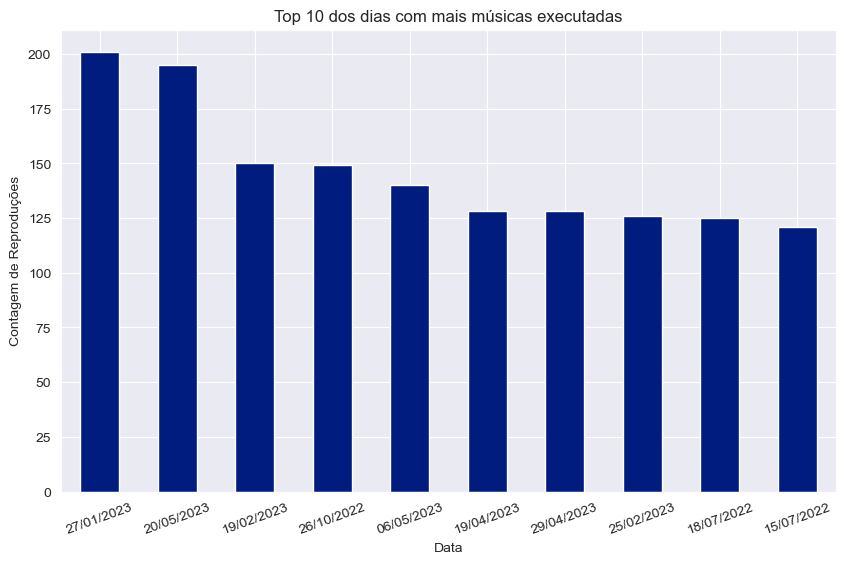

In [43]:
#plotar grafico
sns.set_palette('dark')
plt.figure(figsize=(10, 6))
contagem_datas.plot(kind='bar')
plt.title('Top 10 dos dias com mais músicas executadas')
plt.xlabel('Data')
plt.ylabel('Contagem de Reproduções')
plt.xticks(rotation=20)
plt.show()

In [44]:
# Transformar em um dataframe
contagem_datas = pd.DataFrame(contagem_datas).reset_index(drop=False)
contagem_datas = contagem_datas.rename(columns={'index': 'Data', 'Data': 'Contagem'})
contagem_datas

,Data,Contagem
0,27/01/2023,201
1,20/05/2023,195
2,19/02/2023,150
3,26/10/2022,149
4,06/05/2023,140
5,19/04/2023,128
6,29/04/2023,128
7,25/02/2023,126
8,18/07/2022,125
9,15/07/2022,121


In [45]:
# Agrupar por faixa e calcular a soma do tempo de reprodução
reproducoes_por_artista = df.groupby('Artista')['Milissegundos de Reprodução'].sum()

# Ordenar as faixas em ordem decrescente de tempo de reprodução - Top 10
artistas_mais_reproduzidos = reproducoes_por_artista.sort_values(ascending=False).head(10)
artistas_mais_reproduzidos

Artista
Fresno                  182996748
Metallica               152658923
Alice In Chains         151721068
Rammstein               114126092
Bring Me The Horizon     99718981
Pitty                    93736856
Slipknot                 92810053
Hayley Kiyoko            90441279
Mägo de Oz               87838450
Lil Peep                 78560711
Name: Milissegundos de Reprodução, dtype: int64

In [46]:
# Total de tempo de tempo de execução
total_reproducao = df['Milissegundos de Reprodução'].sum()
print(f'O total de Milissegundos de Reprodução é de: {total_reproducao}')

O total de Milissegundos de Reprodução é de: 5222938096


In [47]:
# Convertendo milissegundos para horas / Descobrindo o total de horas de reprodução
horas_de_reproducao = total_reproducao / 3600000
print(f'O total de horas reproduzidas no intervalo de {registro1} e {ultimo_registro} é de {horas_de_reproducao :.2f} horas')

O total de horas reproduzidas no intervalo de 2022-07-07 03:45:00 e 2023-07-09 23:55:00 é de 1450.82 horas


In [48]:
# Intervalo de tempo
intervalo = registro1 - ultimo_registro
intervalo

Timedelta('-368 days +03:50:00')

In [49]:
# Conferindo as alterações na planilha
df

,Data da reprodução,Artista,Música,Milissegundos de Reprodução,Dia_Semana,Data
0,2022-07-07 03:45:00,DotEXE,Monster (Rework),214058,Quinta-feira,07/07/2022
1,2022-07-09 23:57:00,Judas Priest,Victim of Changes - Live,229445,Sábado,09/07/2022
2,2022-07-10 03:15:00,DotEXE,Monster (Rework),40760,Domingo,10/07/2022
3,2022-07-10 03:20:00,Fresno,INV013: DEIXA ELE ANDAR (feat. Nill),173942,Domingo,10/07/2022
4,2022-07-10 03:24:00,Residente,This is Not America (feat. Ibeyi),231332,Domingo,10/07/2022
...,...,...,...,...,...,...
3307,2023-07-09 23:52:00,T.I.,Dead And Gone,12796,Domingo,09/07/2023
3308,2023-07-09 23:52:00,Ne-Yo,Because Of You,1942,Domingo,09/07/2023
3309,2023-07-09 23:53:00,Ne-Yo,Mad,3903,Domingo,09/07/2023
3310,2023-07-09 23:53:00,Ne-Yo,Let Me Love You (Until You Learn To Love Yours...,2159,Domingo,09/07/2023


## Salvar no Excel as informações obtidas

In [51]:
# Obter a data e hora atual
data_atual = datetime.now()
# Extrair o ano e o mês
ano_atual = data_atual.year
mes_atual = data_atual.month

#criar o caminho para o arquivo ser salvo
caminho_arquivo = fr'C:\Users\Usuário\Documents\DataScience\Projetos\Spotify\MyData\Dados_Spotify_{ano_atual}-{mes_atual:02d}.xlsx'

# Crie um objeto ExcelWriter usando o arquivo como destino
arq_excel = pd.ExcelWriter(caminho_arquivo, engine='openpyxl')

# Salve o DataFrame 1 na primeira aba
df.to_excel(arq_excel, sheet_name='BD_Spotify', index=False)

# Salve o DataFrame 2 na segunda aba
contagem_artista.to_excel(arq_excel, sheet_name='Top10_Artistas', index=False) 

# Salve o DataFrame 3 na segunda aba
artista_musicas_mais_tocadas.to_excel(arq_excel, sheet_name='Playlist_Artista_mais_tocado')

# Salve o DataFrame 4 na segunda aba
musica_artista.to_excel(arq_excel, sheet_name='Playlist_Musicas_mais_tocadas', index=False)

# Salve o DataFrame 5 na segunda aba
contagem_datas.to_excel(arq_excel, sheet_name='Datas_com_mais_execucao', index=False)

# Salvar os graficos no excel
worksheet = arq_excel.book.create_sheet('Grafico1')
img = Image(r'C:\Users\Usuário\Documents\DataScience\Projetos\Spotify\Graficos\grafico1.jpeg')
worksheet.add_image(img, 'B2')

# Salve e feche o arquivo Excel
arq_excel.close()

print('Planilha e abas criados com sucesso!')

Planilha e abas criados com sucesso!
